# **Getting Started with ValidOcean**

#### **Description:**
This tutorial notebook introduces the ModelValidator Class used for vaidating ocean model outputs & accessing ocean observations via cloud object storage.


To demonstrate the basic features of the ModelValidator Class, we will use outputs from the **National Oceanography Centre's** Near-Present-Day global 1-degree (eORCA1-NPD-ERA5v1) ocean sea-ice simulation, which represents the historical period from 1976 - present.

For more details on this model configuration and the available outputs, users should explore the Near-Present-Day documentation [here](https://noc-msm.github.io/NOC_Near_Present_Day/).

### **Contact:**
Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import required libraries -- #
import xarray as xr
from ValidOcean import ModelValidator

/home/otooth/miniconda3/envs/env_nemo_validation/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


#### **Accessing Example Ocean Model Data**

We will begin by using the [xarray](https://xarray.dev) Python library to load an example dataset from the eORCA1-NPD-ERA5v1 outputs available on the [JASMIN Object Store](https://help.jasmin.ac.uk/docs/short-term-project-storage/using-the-jasmin-object-store/). 

To start, we will load the [NEMO](https://www.nemo-ocean.eu) ocean model domain variables and then we will load monthly mean sea surface temperatures for the global domain...

In [2]:
# Define url to domain store:
url_domain = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca1-era5v1/domain/"
ds_domain = xr.open_zarr(url_domain, consolidated=True)

# Define url to sea surface temperature (tos_con) store:
url_tos_con = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca1-era5v1/T1m/tos_con/"
ds_tos_con = xr.open_zarr(url_tos_con, consolidated=True)

ds_tos_con

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time_counter: 585)
Coordinates:
    nav_lat        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    nav_lon        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 5kB 1976-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time_counter, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>

#### **Preparing Example Ocean Model Data**

Next, we need to update our ocean model coordinate variables to conform to the standard names used by ValidOcean.

We also need to add a mask file distinguishing between land and ocean grid cells in the model domain. 

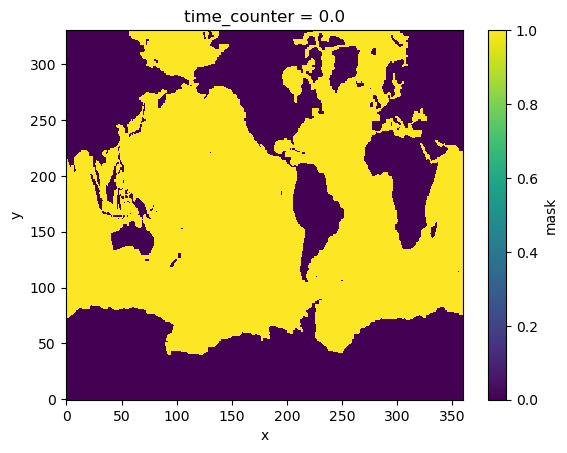

In [3]:
# Updating model coords:
ds_tos_con = ds_tos_con.rename({'nav_lat': 'lat', 'nav_lon': 'lon', 'time_counter': 'time'})

# Adding a 2-D land/ocean mask to our Dataset:
ds_tos_con['mask'] = ds_domain['tmaskutil'].squeeze()

ds_tos_con['mask'].plot()

#### **Creating A ModelValidator**

The ModelValidator is the core class of the ValidOcean library, giving users access to methods designed to accelerate the validation of ocean general circulation models & a range of ocean observations stored in the cloud.

To get started, let's create an instance of ModelValidator() class using our example ocean model outputs... 

In [4]:
# Creating an empty ModelValidator object:
mv = ModelValidator(mdl_data=ds_tos_con)
mv


<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    lon            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>

-- Observations --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Results --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Stats --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
   

#### **Components of a ModelValidator**

Following the creation of an empty ModelValidator, the above output shows us that a Model Validator object is simply a container for many xarray Datasets which we have yet to populate with any data!

There are **four** core attributes of each ModelValidator object:

1. **Model Data:** A Dataset storing the original ocean model data that we provided as input.

2. **Observations:** An empty Dataset to store any ocean observations that we load or use in our validation workflow.

3. **Results:** An empty Dataset to store any results of our validation workflows (e.g., model - observation errors).

4. **Statistics:** An empty Dataset to store any aggregated statistics resulting from our validation workflows (e.g., RMSE of model - observation errors).

To access any core attributes of our ModelValidator, we can simply use its corresponding attribute...

In [5]:
# Accessing our original ocean model data:
mv.data

<xarray.Dataset> Size: 281MB
Dimensions:        (y: 331, x: 360, time: 585)
Coordinates:
    lat            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    lon            (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) datetime64[ns] 5kB 1976-01-16T12:00:00 ... 2024-09-16
    time_counter   float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time, y, x) float32 279MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>
    mask           (y, x) int8 119kB dask.array<chunksize=(331, 360), meta=np.ndarray>

#### **Creating an Empty ModelValidator**

In addition to providing many reusable validation workflows (see below), ModelValidator objects can also be used as an interface to ocean observations stored in the cloud.

When accessing or compare ocean observations, we can also create an empty ModelValidator without passing any ocean model outputs as follows...

In [6]:
ModelValidator()


<ModelValidator>

-- Model Data --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Observations --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Results --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

-- Stats --

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

#### **Next Steps...**

In this tutorial, we have seen how to create a ModelValidator object and introduced its core components.

Next, we will introduce validation workflows using our example sea surface temperature dataset in the **ex2_sst_validation_workflow.ipynb** notebook.